# **EDA: Univariate Analysis**

- In univariate analysis, we analyze a single variable at a time
- It helps to understand the distribution, central tendency, and dispersion of the variable

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Reading and Understanding the Data

In [121]:
# importing dataset
df = pd.read_csv('train.csv') 

In [122]:
# looking at first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
# last five rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [124]:
# shape of data
df.shape

(891, 12)

**Data has 891 rows and 12 columns**

In [125]:
# Printing all columns names
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [126]:
# A closer look at the data types present in the data
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [127]:
# Looking for missing values 
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [128]:
# Looking for the duplicate rows
df.duplicated().sum()

0

In [129]:
# Statistical summary of numerical columns
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Summary:**

- There are **891 entries** and **12 features** in the dataset.
- Columns include: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked
- Data types include: int64, float64, and object
- Data contains missing values in the Age, Cabin, and Embarked columns
- No duplicate rows are present in the dataset

### 2. Variable Identification and Typecasting

**pandas is not very good when it comes to recognising the datatype of the imported variables. So we'll analyze the datatypes of each variable and converting them to appropriate types if necessary.**

In [130]:
# A closer look at the data types preseent in the data
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

There are three main data types in the dataset, let's have a look at **one datatype at once**. We'll start with **int**

In [131]:
df.dtypes[df.dtypes == 'int64']

PassengerId    int64
Survived       int64
Pclass         int64
SibSp          int64
Parch          int64
dtype: object

**Summary:**

- **PassengerId** are unique for each passenger. it is **okay as integer.**
- **Survived** 0 represent Survived and 1 not-Survived. **should be converted to Category.**
- **Pclass** represent the passenger class 1st, 2nd or 3rd class, is ordinal data even though it's represented by numbers. **it should also be converted to Category**
- **SibSp** represent the number of siblings/spouses, it is a discrete numerical variable. **it is okay as integer.**

In [132]:
# converted Survived and Pclass to category
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')

# checking
df[['Survived', 'Pclass']].dtypes

Survived    category
Pclass      category
dtype: object

**Survived and Pclass has been converted to Category.**

Now, Float datatypes

In [133]:
df.dtypes[df.dtypes == 'float64']

Age     float64
Fare    float64
dtype: object

**Summary**

- **Age** is a continuous numerical variable. **it is okay as float.**
- **Fare** is also a continuous numerical variable. **it is okay as float.**

Now, Object datatypes

In [134]:
df.dtypes[df.dtypes == 'object']

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

**Summary**

- **Name**, **Ticket** and **Cabin** is okay to be object datatype as they contains string values. as they are identifiers and not useful for analysis can be drop from the dataset.
- **Sex** has two values (male and female) which represent gender. **it should be converted to Category.**
- **Embarked** has three unique values (C, Q, S) representing the port of embarkation. **it should be converted to Category.**

In [135]:
# converting Sex and Ebmarked to Category
df['Sex'] = df['Sex'].astype('category')
df['Embarked'] = df['Embarked'].astype('category')

# checking
df[['Sex', 'Embarked']].dtypes

Sex         category
Embarked    category
dtype: object

**Sex and Embarked has been converted to Category.**

In [136]:
# final look at dtypes
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

**Perfect, finally we can see that all the variables are now assigned their respective datatypes.**

### 3. Univariate Analysis

#### - Numerical Data

In [137]:
# numeric variables
numeric_df = df.select_dtypes(include = 'number')
numeric_df.head()

,PassengerId,Age,SibSp,Parch,Fare
0,1,22.0,1,0,7.2500
1,2,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,4,35.0,1,0,53.1000
4,5,35.0,0,0,8.0500


**We have 5 numeric columns in the data.**

In [138]:
numeric_col = ['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']

When dealing with numerical variables, we have to check their properties like:

- Mean
- Median
- Standard Deviation
- Kurtosis/Skewness
- Distribution/Range

Now to visualise all numeric variables at once with all the necessary descriptives, let's define a universal/reusable function to do that.

In [139]:
# defining function for univariate analysis of numeric variables
def UVA_numeric(data, numeric_col):
    """ 
    plots the distribution of each numeric variable along with key descriptive statistics.
    """
    plt.figure(figsize=(14, 12))

    # looping through each variable
    for j, i in enumerate(numeric_col):

        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # calculating points of standard deviation
        points = [mean-st_dev, mean+st_dev]

        # Plotting the variable with every information
        plt.subplot(len(numeric_col)//2 + len(numeric_col)%2, 2, j+1)
        sns.kdeplot(data[i], fill=True, color='lightcoral')
        sns.lineplot(x=points, y=[0,0], color='black', label='st_dev', lw=3)
        sns.scatterplot(x=[mini, maxi], y=[0,0], color='teal', label='min/max', s=60)
        sns.scatterplot(x=mean, y=[0], color='red', label='mean', s=60)
        sns.scatterplot(x=median, y=[0], color='blue', label='median', s=60)
        plt.tight_layout(pad=3.0)
        plt.xlabel(i, fontsize=14)
        plt.ylabel('Density', fontsize=14)
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}; \nmean = {}; median = {}'.format((round(points[0],2) , round(points[1],2)), round(kurt, 2), round(skew,2), (round(mini,2),round(maxi,2), round(ran,2)), round(mean,2), round(median,2)))

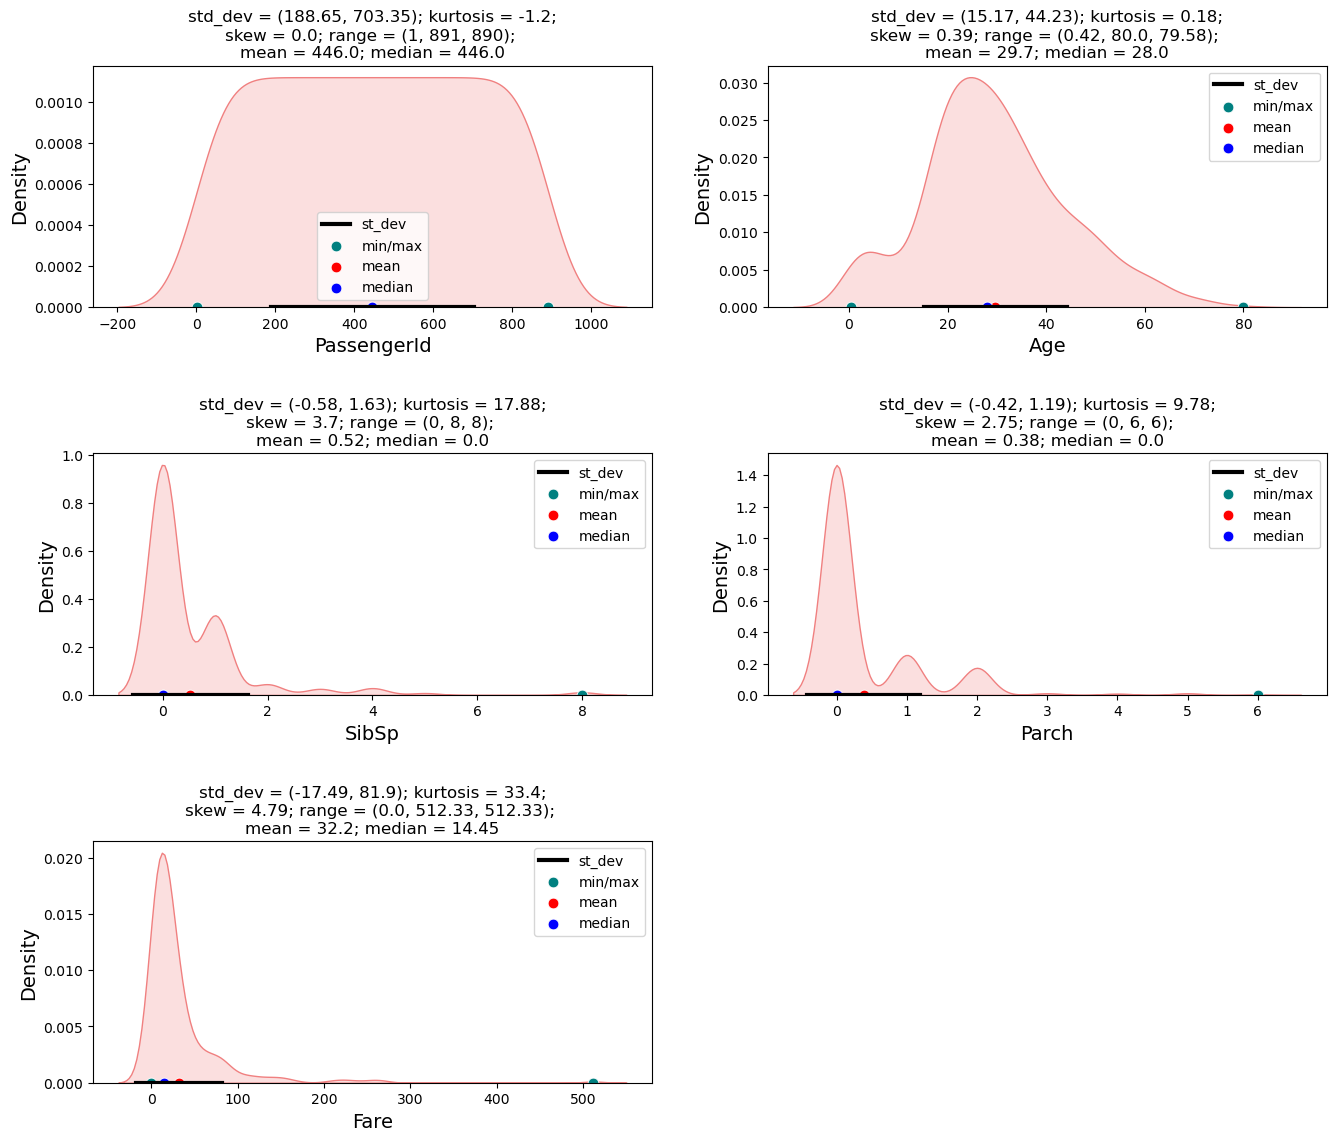

In [140]:
UVA_numeric(df, numeric_col)

In [141]:
df['Fare'].mean() - df['Fare'].std(), df['Fare'].mean() + df['Fare'].std()

(-17.48922062860627, 81.89763656575553)

In [142]:
df['SibSp'].median()

0.0

**Check for missing values in numeric columns:**

In [297]:
# missing values in numeric columns
numeric_df.isna().sum()

PassengerId      0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

<Axes: >

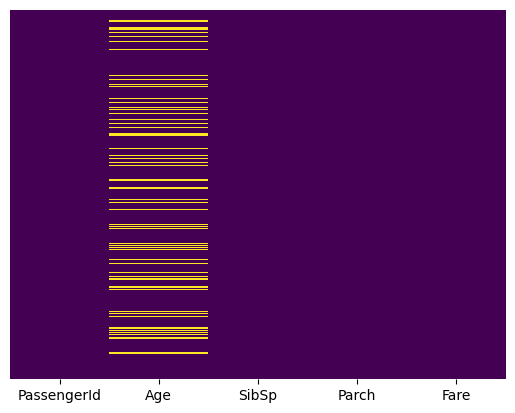

In [307]:
sns.heatmap(numeric_df.isna(), yticklabels=False, cbar=False, cmap='viridis')

**Summary of Univariate Analysis of Numeric Variables:**

- **PassengerId:**

  - Variable is **unique for each passenger. hence uniform** distribution.
  - This variable **does not contribute any information.**
  - **can be dropped** from the dataset.

- **Age:**

  - Median Age = 28.0 years
  - **Most passengers age is between 15 to 44 years.**
  - skewness = +0.39, passengers age is **slightly right-skewed.**
  - kurtosis = 0.18, distribution is **approximately normal.** and very less like to have outliers.
  - There are some missing values in Age column that need to be handled.

- **SibSp:**
  
  - Median SibSp = 0, shows that **most passengers were travelling alone.**
  - skewness = +3.52, distribution is **highly right-skewed.**
  - kurtosis = 19.78: distribution is **leptokurtic.** and likely to have outliers.

- **Parch:**
  
  - Median Parch = 0, which also shows that **most passengers were travelling alone.**
  - skewness = 2.75: distribution is **highly right-skewed.**
  - kurtosis = 9.78: likely to have outliers.

- **Fare**

  - Median Fare = 14.45
  - skewness = 4.79, distribution is **positively skewed.**
  - kurtosis = 33.25: Extreme values and Outliers are very likely to be present in Fare.
  
Things to further investigate:

- **Do first-class passengers or those who paid higher fares have higher survival rates?**

#### - Categorical Variables

In [308]:
categorical_df = df.select_dtypes(include = 'category')
categorical_df.head()

,Survived,Pclass,Sex,Embarked
0,0,3,male,S
1,1,1,female,C
2,1,3,female,S
3,1,1,female,S
4,0,3,male,S


In [311]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [309]:
categorical_df.dtypes

Survived    category
Pclass      category
Sex         category
Embarked    category
dtype: object

**We have 4 categorical variables in the dataset.**

In [145]:
cat_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

In [146]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [283]:
# function for visualization of categorical variables
def UVA_category(data, cat_cols):
    """
    Univariate Analysis_categorical
    take categoricla cols plot/print value_counts and countplot
    """
    plt.figure(figsize=(14, 12))

    for j, i in enumerate(cat_cols):
        v_perc = round(data[i].value_counts(normalize=True) * 100, 2)
        n_uni = data[i].nunique()
        
        plt.subplot(len(cat_cols)//2+len(cat_cols)%2, 2, j+1)
        sns.countplot(y=data[i], hue=data[i])
        plt.ylabel(i, fontsize=14)
        plt.xlabel('Count', fontsize=14)
        plt.tight_layout(pad=3.0)
        plt.title('n_unique = {}\n value count % of {}'.format(n_uni, v_perc))

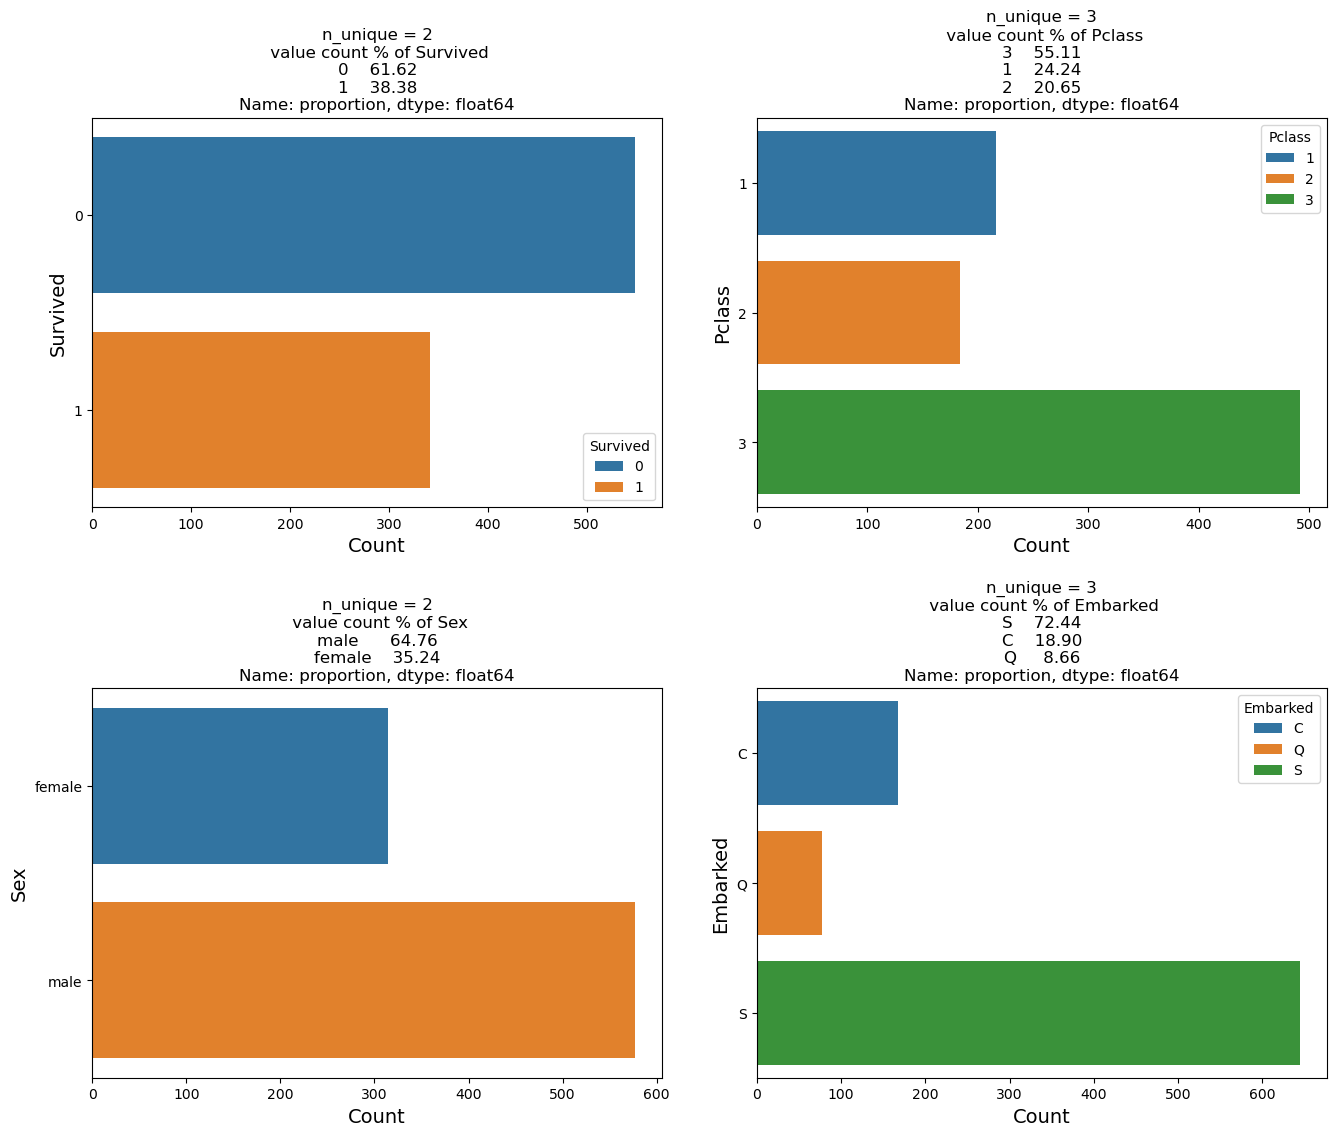

In [284]:
UVA_category(df, cat_cols)

In [290]:
# value cout for each categorical variable
for j, i in enumerate(cat_cols):
    value_counts = df[i].value_counts()
    print(f'{value_counts}\n')

Survived
0    549
1    342
Name: count, dtype: int64

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex
male      577
female    314
Name: count, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



**Check for Missing values in categorical columns:**

In [ ]:
# missing values in categorical columns
categorical_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Embarked    2
dtype: int64

**Summary of Univariate Analysis of Categorical Variables:**

- **Survived:**

  - 549 (61.62%) passengers did not survive
  - 342 (38.38%) passengers survived

- **Pclass:**

  - There were three classes of passengers (1st , 2nd, and 3rd class)
  - 216 (24.65%) passengers were in 1st class
  - 184 (20.92%) passengers were in 2nd class
  - 491 (55.11%) passengers were in 3rd class

- **Sex:**
  - 577 (64.76%) passengers were male
  - 314 (35.24%) passengers were female

- **Embarked:**

  - We have three ports of embarkation in the data: Southampton (S), Cherbourg (C), and Queenstown (Q)
  - 644 (72.44%) passengers boarded at Southampton
  - 168 (18.90%) passengers boarded at Cherbourg
  - 77 (8.66%) passengers boarded at Queenstown
  - has few missing values that need to be handled

#### - Other Variables

In [320]:
others_df = df.select_dtypes(include='object')
others_df.head()

,Name,Ticket,Cabin
0,"Braund, Mr. Owen Harris",A/5 21171,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85
2,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123
4,"Allen, Mr. William Henry",373450,NaN


In [ ]:
# missing values 
others_df.isna().sum()

Name        0
Ticket      0
Cabin     687
dtype: int64

- **Name:**

  - Contains the full name of each passenger
  - Not useful for analysis, can be dropped from the dataset

- **Ticket:**

  - Contains the ticket number for each passenger
  - can be dropped from the dataset

- **Cabin:**

  - Contains the cabin number for each passenger
  - Has a lot of missing values
  - also can be dropped from the dataset

#### Summary of Univariate Analysis

- **PassengerId, Name, Ticket and Cabin** columns **can be dropped** from the dataset
- There are **outliers present in Age, SibSp, Parch and Fare columns** that need to be handled
- There are **missing values in Age and Embarked columns** that need to be handled